# **EDA Homicidios en Colombia**

Este proyecto busca analizar, modelar y predecir los homicidios ocurridos en Colombia a partir de información oficial de tipo espacial y temporal.
Se utilizan tres fuentes principales de datos: homicidios, departamentos y municipios, con el objetivo de identificar patrones, entender factores asociados y construir modelos predictivos que ayuden a la toma de decisiones en política pública y seguridad ciudadana.

El proyecto combina análisis exploratorio, aprendizaje automático supervisado y técnicas espaciales/temporales.

## **Obetivos**

1. Describir los patrones espaciales y temporales de los homicidios en Colombia.
2. Predecir el número de homicidios o la probabilidad de ocurrencia de eventos en municipios específicos.
3. Identificar factores geográficos, demográficos o temporales asociados al riesgo.
4. Apoyar la toma de decisiones y priorización de recursos de seguridad ciudadana.

In [39]:
# importar librerias necesarias
import pandas as pd 
import polars as pl 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sodapy import Socrata

# Establecer opciones de visualización
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Parametros de visualización
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (16, 8.5)

In [3]:
# Lectura del archivo 
hom = pd.read_csv(r"C:\Users\Rai De  León\Documents\1Projects\Homicidios\Machine-Learning-BD-Homicidios-Colombia\HOMICIDIO_20251014.csv")

In [41]:
# Probando descarga desde la API 
client = Socrata('www.datos.gov.co', None)
result = client.get('m8fd-ahd9', limit=340000)
df = pd.DataFrame.from_records(result)
df.shape

(331026, 8)

In [5]:
hom[hom['FECHA HECHO'] == "22/10/2024"]

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,ZONA,SEXO,CANTIDAD
316738,22/10/2024,11,BOGOTA D.C.,11001,BOGOTA D.C.,URBANA,MASCULINO,1
316739,22/10/2024,11,BOGOTA D.C.,11001,BOGOTA D.C.,URBANA,MASCULINO,1
316740,22/10/2024,11,BOGOTA D.C.,11001,BOGOTA D.C.,URBANA,MASCULINO,1
316741,22/10/2024,76,VALLE DEL CAUCA,76001,CALI,URBANA,MASCULINO,1
316742,22/10/2024,13,BOLIVAR,13001,CARTAGENA,URBANA,MASCULINO,1
316743,22/10/2024,13,BOLIVAR,13001,CARTAGENA,URBANA,MASCULINO,1
316744,22/10/2024,5,ANTIOQUIA,5154,CAUCASIA,URBANA,MASCULINO,1
316745,22/10/2024,5,ANTIOQUIA,5172,CHIGORODO,RURAL,MASCULINO,1
316746,22/10/2024,47,MAGDALENA,47189,CIENAGA,URBANA,MASCULINO,1
316747,22/10/2024,73,TOLIMA,73319,GUAMO,RURAL,MASCULINO,1


In [6]:
# Filtro
hom[hom['MUNICIPIO'].str.contains('Chinaco', case=False)]

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,ZONA,SEXO,CANTIDAD
3482,21/02/2003,54,NORTE DE SANTANDER,54172,CHINACOTA,RURAL,MASCULINO,1
6249,04/04/2003,54,NORTE DE SANTANDER,54172,CHINACOTA,RURAL,FEMENINO,1
6434,06/04/2003,54,NORTE DE SANTANDER,54172,CHINACOTA,RURAL,MASCULINO,1
9533,25/05/2003,54,NORTE DE SANTANDER,54172,CHINACOTA,URBANA,MASCULINO,1
10235,06/06/2003,54,NORTE DE SANTANDER,54172,CHINACOTA,URBANA,MASCULINO,1
19650,17/11/2003,54,NORTE DE SANTANDER,54172,CHINACOTA,URBANA,MASCULINO,1
34309,08/08/2004,54,NORTE DE SANTANDER,54172,CHINACOTA,URBANA,MASCULINO,1
34992,22/08/2004,54,NORTE DE SANTANDER,54172,CHINACOTA,URBANA,FEMENINO,1
36980,02/10/2004,54,NORTE DE SANTANDER,54172,CHINACOTA,RURAL,MASCULINO,1
37268,08/10/2004,54,NORTE DE SANTANDER,54172,CHINACOTA,URBANA,MASCULINO,1


In [7]:
# Paleta de colores 
paleta = {
    'Tonalidad rosa': "#F3DBED",
    'Verde-Azul Intermedio': '#A8DDB5',
    'Verde Fuerte': '#43A2CA',
    'Verde Oscuro': '#1B9E77',
    'Azul Marino': '#004488',
    'Verde Esmeralda': '#3CB371',
    'Azul Acero': '#4682B4',
    'Verde Bosque': '#228B22',
    'Azul Profundo': '#1E658C',
    'Cian Marino': '#5F9EA0',
    'Verde Oliva Suave': '#7D9F5E',
    'Verde Menta Claro': '#98FB98'
    
    }

# Paleta de colores sexo 
color_sexo = {
    'MASCULINO':'#4682B4',
    'FEMENINO': "#F3DBED",
    'NO REPORTA': '#98FB98',
    'SIN ESTABLECER':'#5F9EA0'
}

# Modificaciones y limpieza de los datos 

In [8]:
# Es necesario convertir FECHA HECHO a formato DateTime 
hom['FECHA HECHO'] = pd.to_datetime(hom['FECHA HECHO'], format='%d/%m/%Y')

# Extraer año para agrupar mejor las fechas 
hom['AÑO'] = hom['FECHA HECHO'].dt.year

hom['MES'] = hom['FECHA HECHO'].dt.month

In [9]:
# Extracción de valores únicos columna SEXO 
(
    hom['SEXO']
    .unique()
    .tolist()
)

['MASCULINO', 'FEMENINO', 'NO REPORTA', 'SIN ESTABLECER']

In [10]:

# Cantiades Maximas y minimas de hechos 
max = hom['CANTIDAD'].max()
min = hom['CANTIDAD'].min()
mediana = hom['CANTIDAD'].min()

In [11]:
print(f'''\n información general del conjunto de datos
      
     Cantidad Maxima de homicidios : {max}\n
     Valor Mediana de homicidiods  : {mediana}\n
     Cantidad mínima de homicidios : {min}\n
      ''')


print(hom.info())


 información general del conjunto de datos

     Cantidad Maxima de homicidios : 25

     Valor Mediana de homicidiods  : 1

     Cantidad mínima de homicidios : 1

      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328513 entries, 0 to 328512
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   FECHA HECHO   328513 non-null  datetime64[ns]
 1   COD_DEPTO     328513 non-null  int64         
 2   DEPARTAMENTO  328513 non-null  object        
 3   COD_MUNI      328513 non-null  int64         
 4   MUNICIPIO     328513 non-null  object        
 5   ZONA          328513 non-null  object        
 6   SEXO          328513 non-null  object        
 7   CANTIDAD      328513 non-null  int64         
 8   AÑO           328513 non-null  int32         
 9   MES           328513 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(3), object(4)
memory usage: 22.6+ MB
None


In [12]:
(
    hom
    .describe(include='int')
)

,COD_DEPTO,COD_MUNI,CANTIDAD,AÑO,MES
count,328513.000000,328513.000000,328513.000000,328513.000000,328513.000000
mean,39.883143,40138.118221,1.006009,2013.032212,6.496014
std,28.958661,28968.581886,0.127831,6.734556,3.455071
min,5.000000,5001.000000,1.000000,2003.000000,1.000000
25%,11.000000,11001.000000,1.000000,2007.000000,4.000000
50%,41.000000,41132.000000,1.000000,2012.000000,6.000000
75%,73.000000,73168.000000,1.000000,2019.000000,9.000000
max,99.000000,99773.000000,25.000000,2025.000000,12.000000


In [13]:
(
    hom
    .describe(include='object')
)

,DEPARTAMENTO,MUNICIPIO,ZONA,SEXO
count,328513,328513,328513,328513
unique,33,1035,2,4
top,VALLE DEL CAUCA,CALI,URBANA,MASCULINO
freq,64666,32226,228214,301950


In [14]:
# Descripción estadística del conjunto de datos
(
    hom['CANTIDAD']
    .describe()
)

count    328513.000000
mean          1.006009
std           0.127831
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          25.000000
Name: CANTIDAD, dtype: float64

<Axes: xlabel='ZONA'>

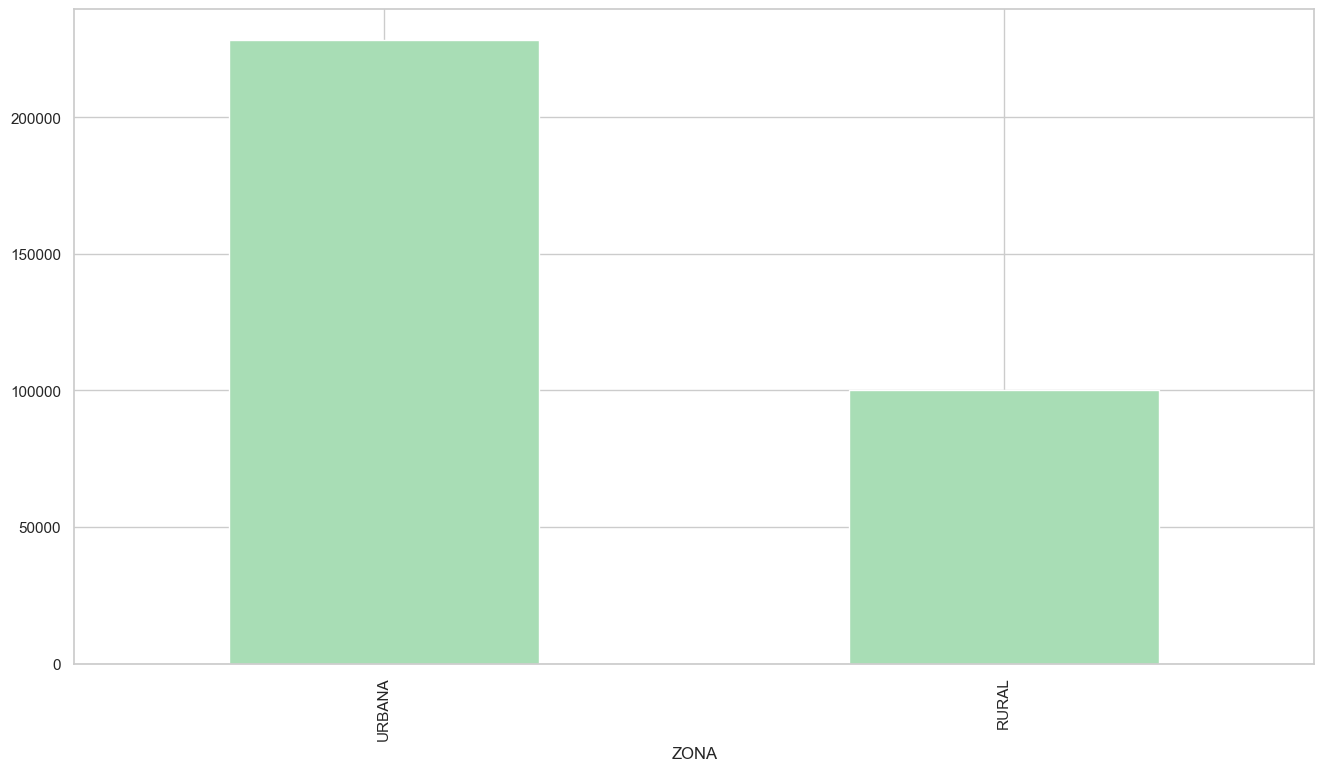

In [15]:
(
    hom
    .ZONA
    .value_counts()
    .plot(
        kind='bar',
        color=paleta['Verde-Azul Intermedio']
        
    )
)

([0, 1, 2, 3],
 [Text(0, 0, 'MASCULINO'),
  Text(1, 0, 'FEMENINO'),
  Text(2, 0, 'NO REPORTA'),
  Text(3, 0, 'SIN ESTABLECER')])

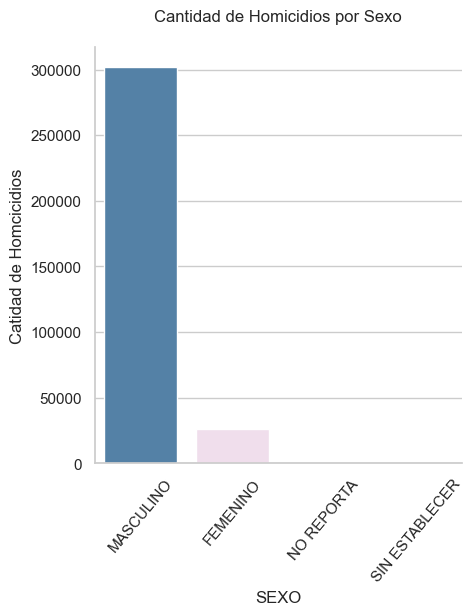

In [16]:
sns.catplot(
    data=hom,
    x='SEXO',
    kind='count',
    palette=color_sexo,
    hue='SEXO'
)


plt.title('Cantidad de Homicidios por Sexo\n')
plt.ylabel('Catidad de Homcicidios')
plt.xticks(rotation=50)


# Los hombres son mas propenso

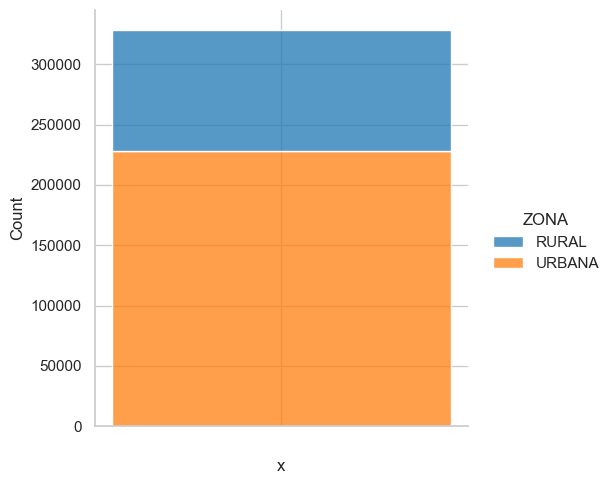

In [17]:
# Versión final corregida y funcional:
(
    hom
    .assign(x=' ') # Añade la columna 'x'
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='ZONA',
                multiple='stack',
            )
        )
    )
)

In [18]:
# APLICACIÓN DE LA REGLA DE ESTURGES 

# Calculo de la bins de un histograma usando FECHA HECHO
bin_fecha = int(1 + 3.3 * np.log10(len(hom['FECHA HECHO'])))
bin_fecha

# Calculo de la bins usando AÑO 
bin_año = int(1 + 3.3 * np.log10(len(hom['AÑO']))) 
bin_año

# Calculo de usando MES 
bin_mes = int(1 + 3.3 * np.log10(len(hom['MES'])))

In [19]:
print(f'''
      bin AÑO: {bin_año}
      bin MES: {bin_mes}
      ''')


      bin AÑO: 19
      bin MES: 19
      


In [20]:
bin_mes

19

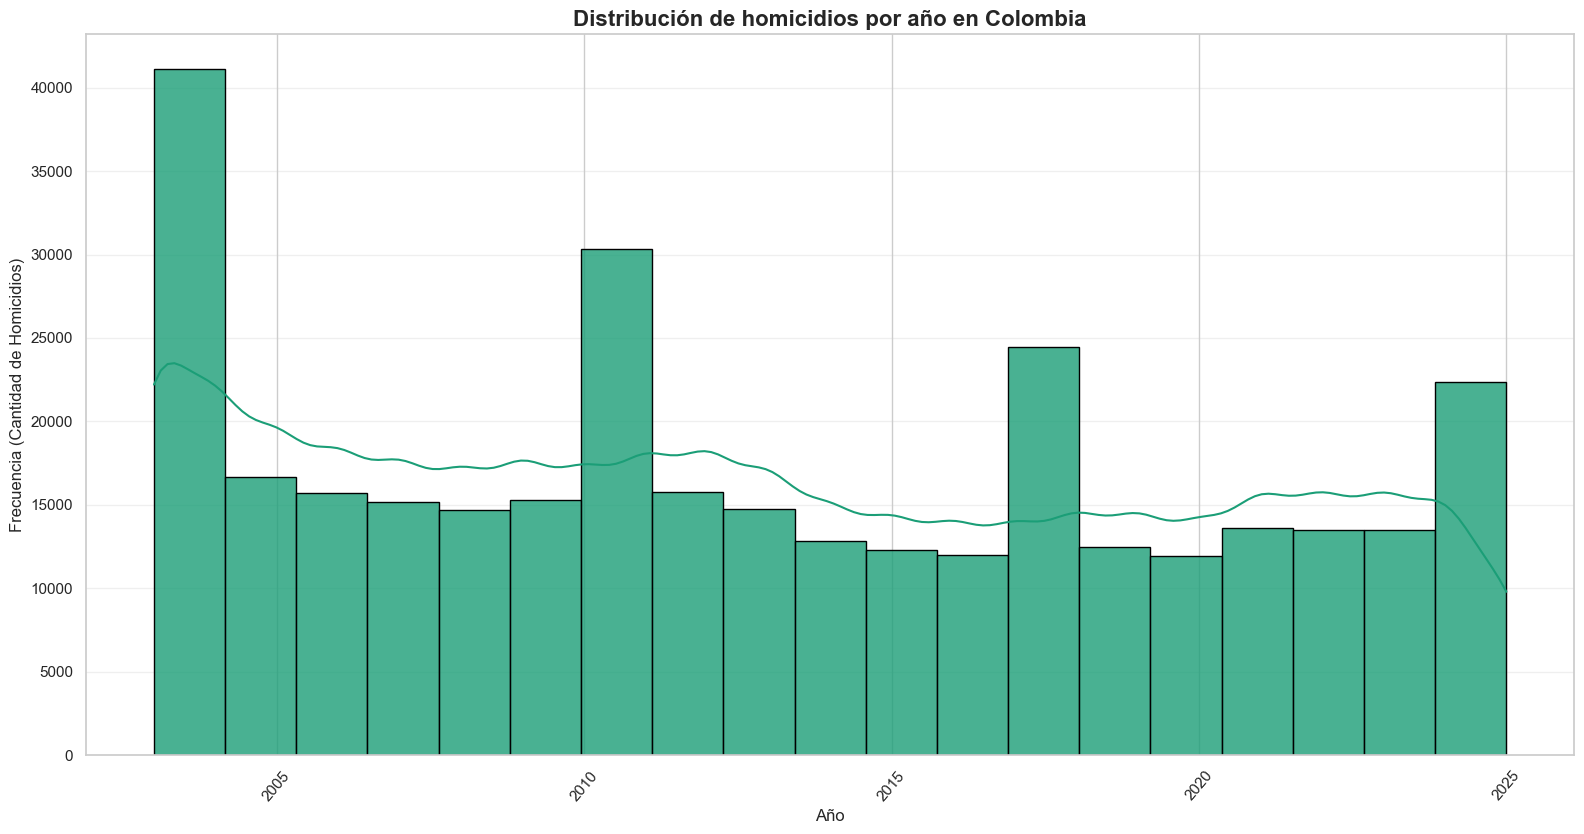

In [21]:
# Creación de histograma 
sns.histplot(
    data=hom,
    x='AÑO',
    bins=bin_fecha,
    kde=True,
    color=paleta['Verde Oscuro'],
    edgecolor='black',
    alpha=0.8
)

plt.title('Distribución de homicidios por año en Colombia',
          fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de Homicidios)', fontsize=12)
plt.xticks(rotation=50)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

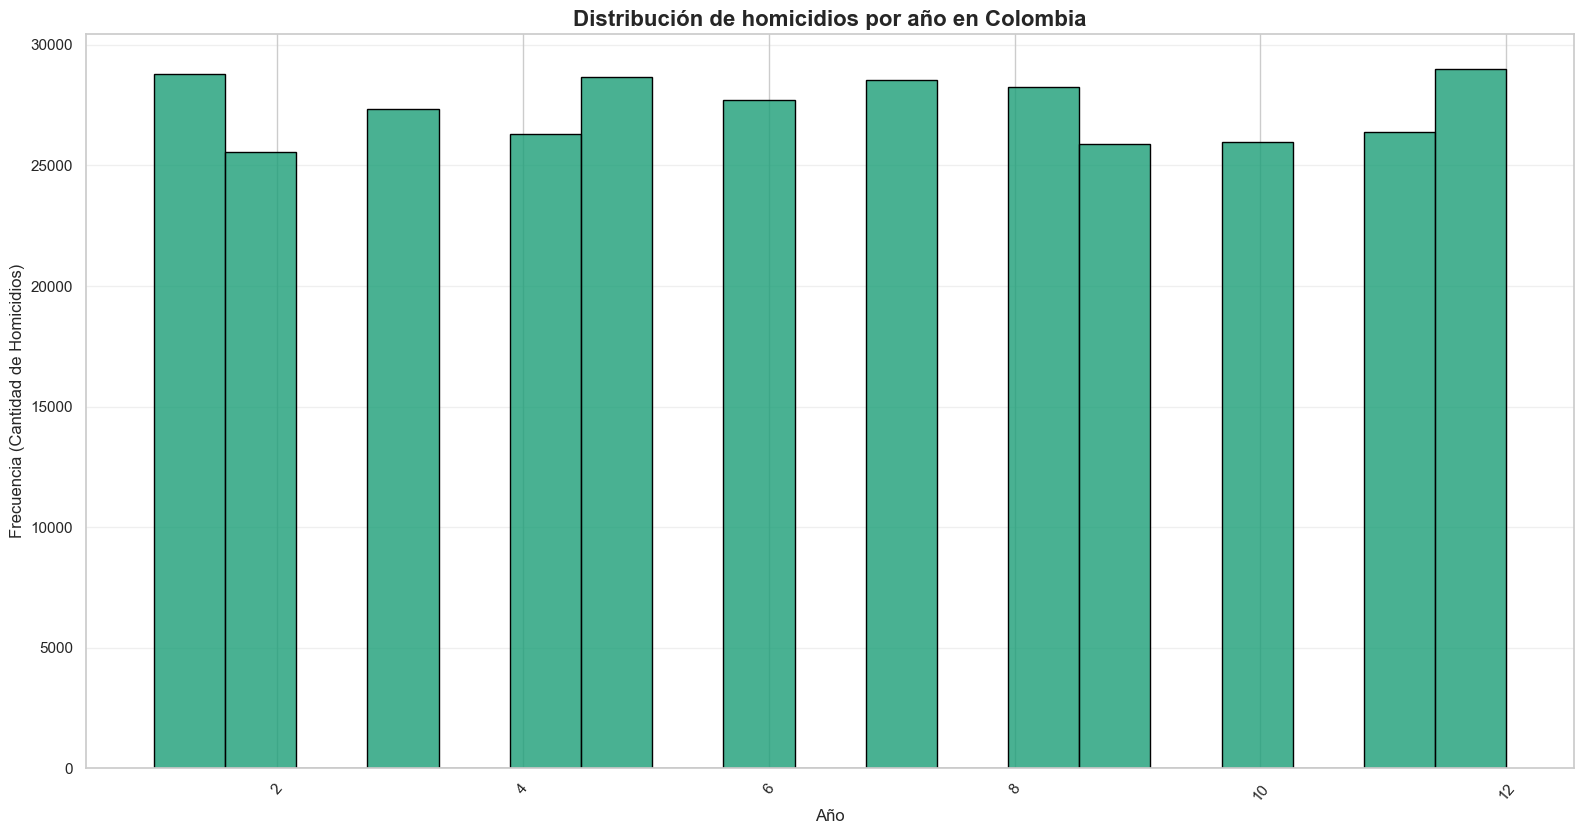

In [22]:
# Creación de histograma 
sns.histplot(
    data=hom,
    x='MES',
    bins=bin_mes,
    kde=False,
    color=paleta['Verde Oscuro'],
    edgecolor='black',
    alpha=0.8,
)

plt.title('Distribución de homicidios por año en Colombia',
          fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de Homicidios)', fontsize=12)
plt.xticks(rotation=50)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

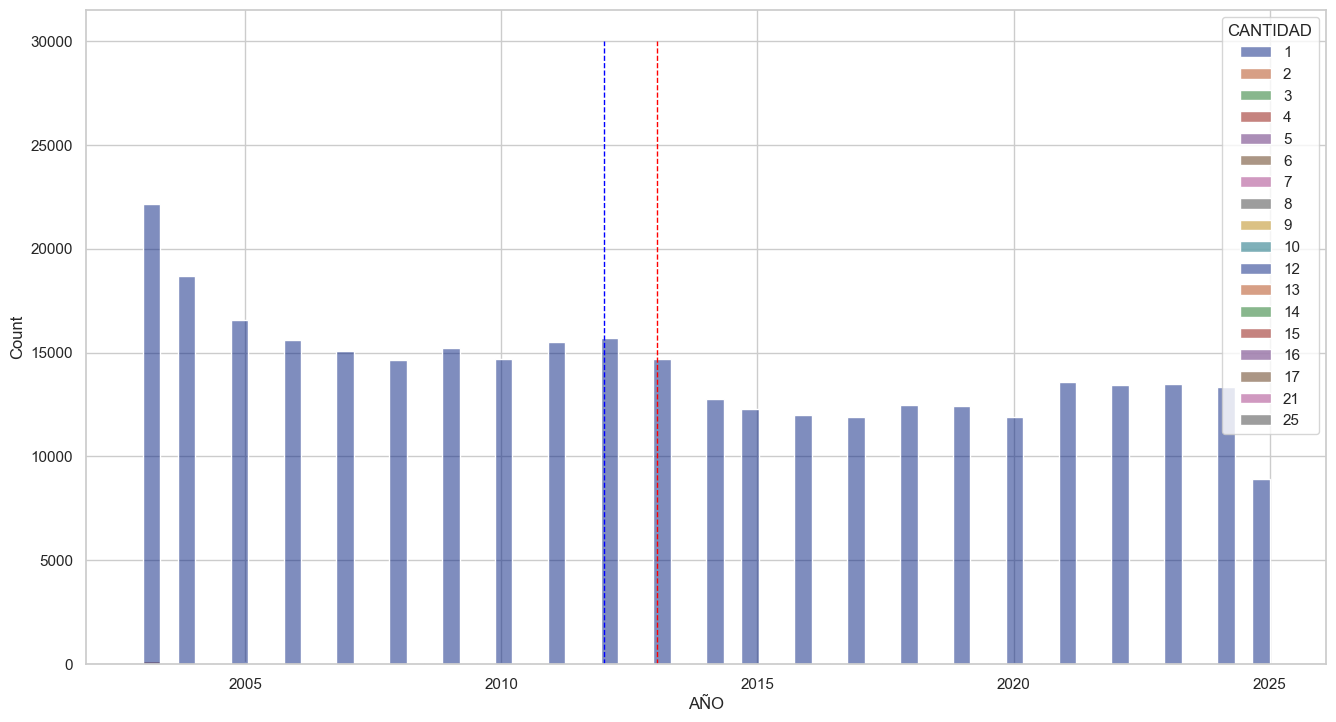

In [23]:
# Histograma y poligono de frecuecia
sns.histplot(
    data=hom,
    x='AÑO',
    hue= 'CANTIDAD',
    palette= 'dark'
)

# Linea de promedio
(
    plt.vlines(
        x = hom.AÑO.mean(),
        ymin = 0,
        ymax = 30000,
        color='red',
        linestyle='dashed',
        linewidth = 1
    )
)

# linea de mediana 
(
    plt.vlines(
        x=hom['AÑO'].median(),
        ymin=0,
        ymax=30000,
        color='blue',
        linestyle='dashed',
        linewidth= 1    
    )
)


<Axes: xlabel='CANTIDAD'>

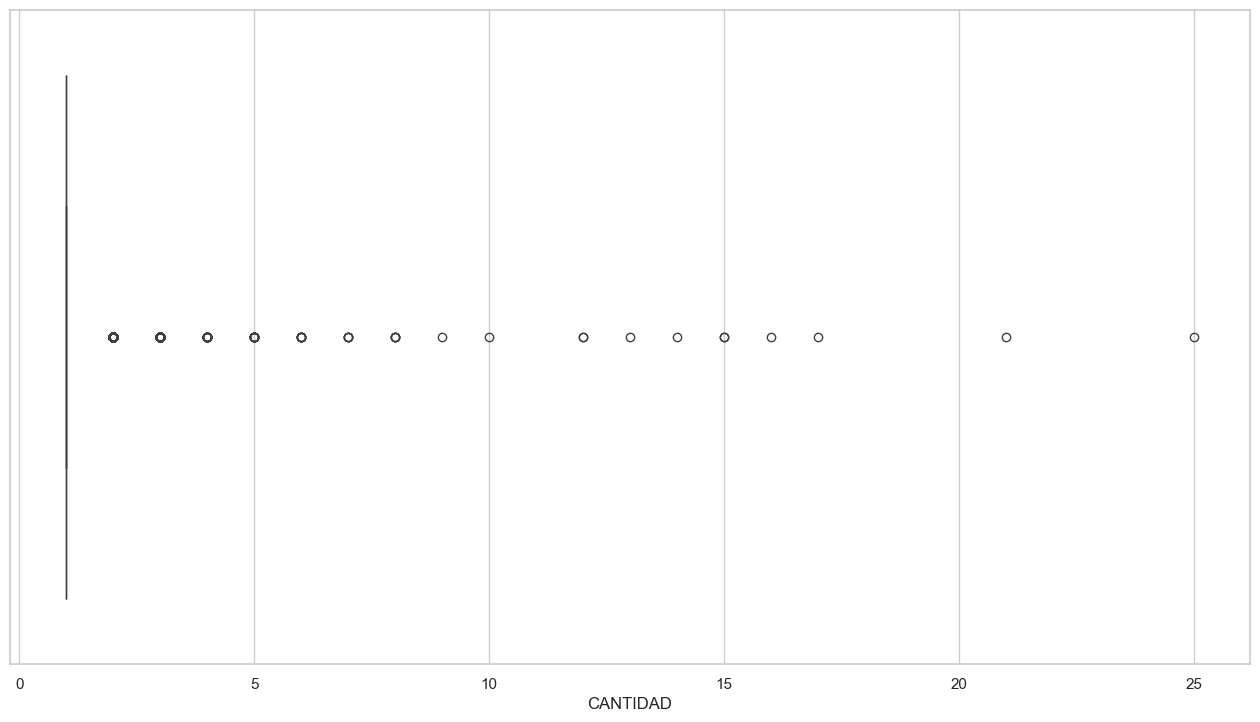

In [24]:
sns.boxplot(
    x=hom['CANTIDAD'],
)

In [25]:
hom['ZONA'].value_counts(normalize=True)

ZONA
URBANA    0.694688
RURAL     0.305312
Name: proportion, dtype: float64

<Axes: xlabel='SEXO', ylabel='CANTIDAD'>

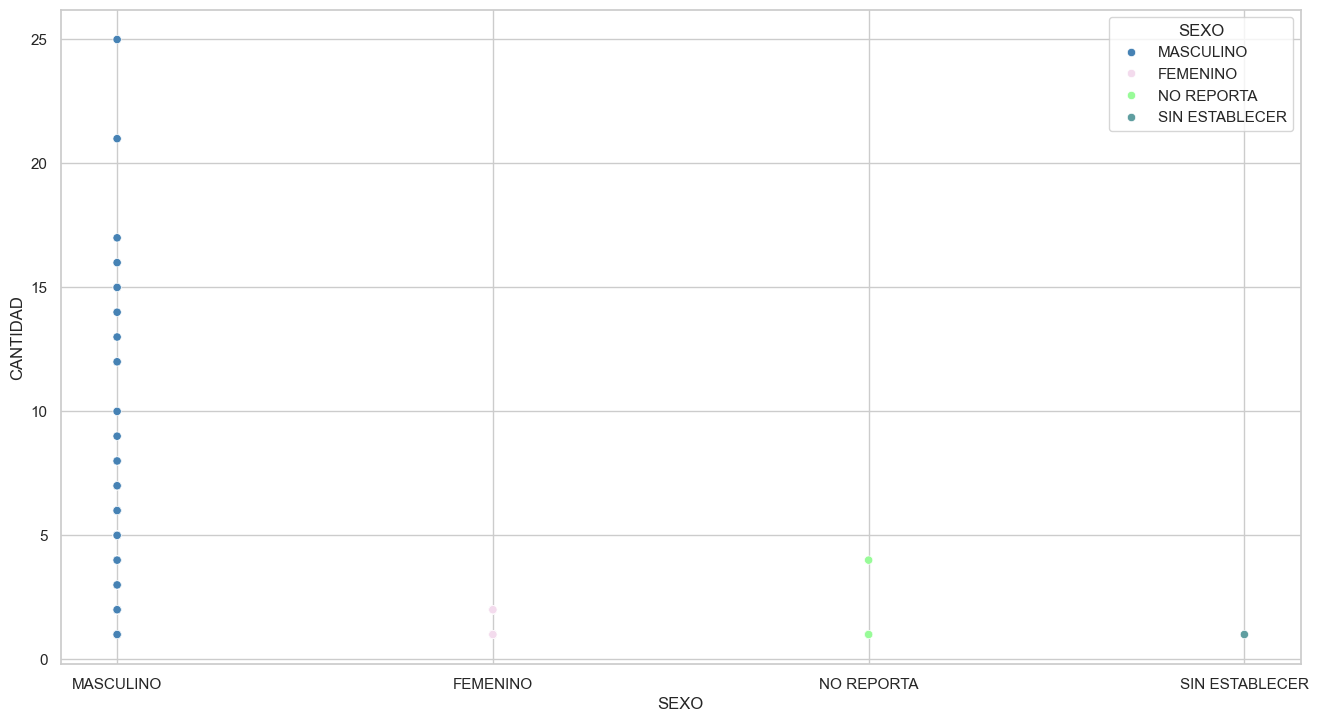

In [26]:
sns.scatterplot(
    data=hom,
    x='SEXO',
    y='CANTIDAD',
    hue='SEXO',
    palette=color_sexo
)